In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
df=pd.read_csv('haberman-2.csv')
#df
#df2=df.status
#print(df2)
#df2=pd.DataFrame(data=df2,columns=['status'])
#print(df2)
#df=df.drop('status',axis=1)

In [55]:
print(df.shape)

(306, 4)


BRIEF ABOUT DATASET:The haberman dataset contains information about cancer patients and their survival after undergoing surgery:
the columns are arranged as-
1)The age at which the patient had the surgery
2)The year of the surgery
3)The number of positive axillary nodes detected
4)The survival rate of the patient(1=the patient survivied 5 years of longer after the surgery and 2=the patient died within 5 years of the surgery)

In [56]:
print(df.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [57]:
df.status.value_counts()

1    225
2     81
Name: status, dtype: int64

OBSERVATION:Clearly from the above information we can see that the dataset given is an imbalanced dataset with the survival rate of people who have had surgery greater than the number of people who have not survived

In [58]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


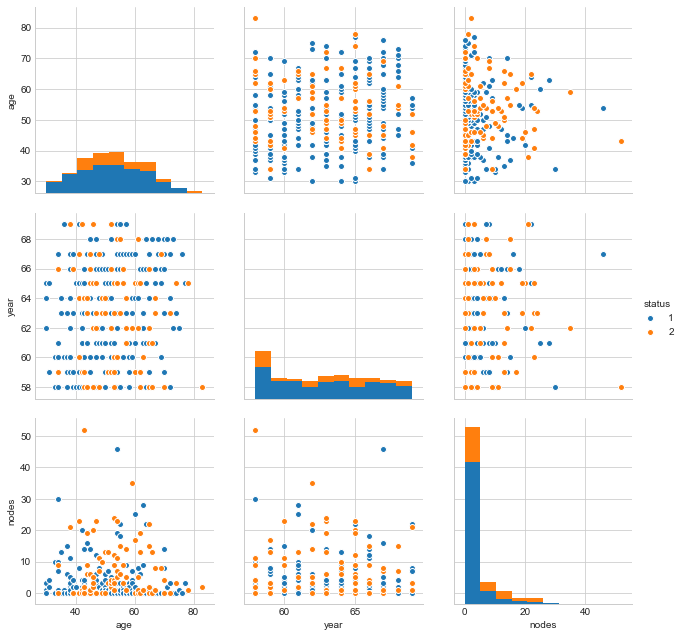

In [62]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="status",vars=["age", "year", "nodes"],size=3)
plt.show()

OBSERVATION:Clearly from the above pair plots it is clear that not much information can be obtained as there are a lot of overlaps in the above case and hence using just one parameter such as age,axillary nodes or year of surgery it is not possible to accurately predict who survived and who did not survive the surgery

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


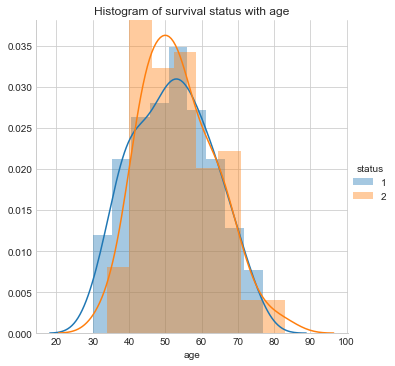

In [63]:
sns.FacetGrid(df,hue='status',size=5).map(sns.distplot,"age").add_legend()
plt.title('Histogram of survival status with age')
plt.show()

OBSERVATION:
1)From the above histogram it is clear that the younger patients who get the surgery done at an early age have a higher probability of suriving.

2)As the age increases the chances of not surviving longer than five years also goes up as can be clearly seen from the plots above.

3)The interesting point to note from the above plot is that from the ages of 60 and higher the probablity of surviving and not surviving is equal.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


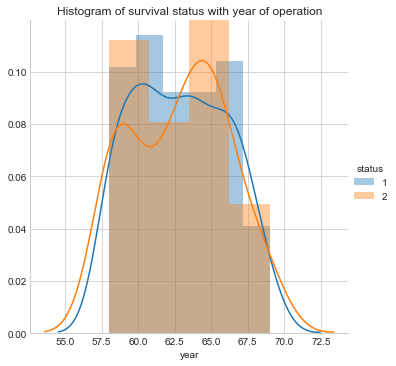

In [64]:
sns.FacetGrid(df,hue='status',size=5).map(sns.distplot,"year").add_legend()
plt.title('Histogram of survival status with year of operation')
plt.show()

OBSERVATIONS:
    From the above plot it is clear that the year during which the surgery was done does not really affect the rate of survival,it just minorly decreases the chancs of survival if the surgery was done before 57.5 and slighlty imporves the chances of survival is the surgery was done after 69.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


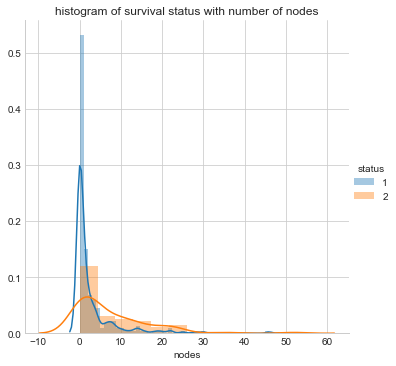

In [65]:
sns.FacetGrid(df,hue='status',size=5).map(sns.distplot,"nodes").add_legend()
plt.title('histogram of survival status with number of nodes')
plt.show()

OBERVATIONS:
Some substantial amount of information can be got from the histogram above,the lesser the number of nodes the better the survuival chances of the patient.

It is quite obvious that someone with no nodes would have the highest chances of survival and our intuition is verified from the above plot as we get a maximum peak at 0 and then it starts decreasing as the number of nodes increases.

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


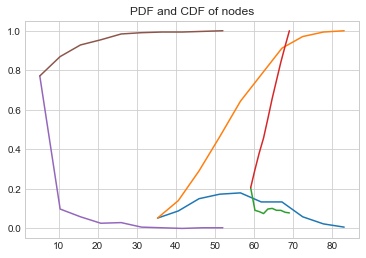

In [66]:
counts, bin_edges = np.histogram(df['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title('PDF and CDF of age')


counts, bin_edges = np.histogram(df['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title('PDF and CDF of year')

#versicolor
counts, bin_edges = np.histogram(df['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title('PDF and CDF of nodes')

plt.show();

OBSERVATION:
    The PDF and the CDF does not help much in telling us who has survived and who has not,it just gives us the probability of the ranges of the various columns that are available in our dataset.

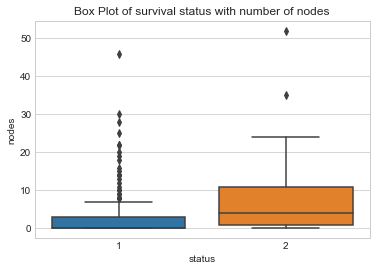

In [67]:
sns.boxplot(x='status',y='nodes', data=df)
plt.title('Box Plot of survival status with number of nodes')
plt.show()

OBSERVATIONS:
From the above box and whisker plot some key observations can be made in the sense that for the people who have survival status as '1' their 25% and 50% values are the same and is 0 which meaans that upto 50% of the people who have survived have 0 axillary nodes and also the inter quantile range is less in this case which is a way of saying that the people whith survival status of '1'have very less nodes.

In the case of status '2' a large range of the people have high numer of nodes and hence their survival rate is very less and the inter quantile range is also very large in this case.

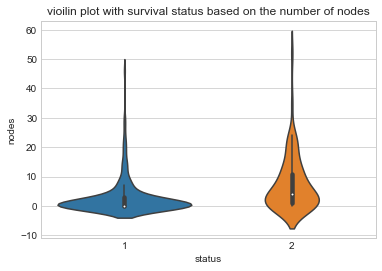

In [68]:
sns.violinplot(x="status", y="nodes", data=df, size=3)
plt.title('vioilin plot with survival status based on the number of nodes')
plt.show()

OBSERVATION:
    Similar to the previous observations already made,we can clearly see from the above plot that the density function on the status '1' patients is narrower than those with status '2' which tells us that most of the people surviving are the ones that have fewer amount of axillary nodes. 

CONCLUSION:
The key takeaway from the above EDA is that from all the given parameters the one that is most useful to detect the cancer survival rate is the numer of nodes,although not 100% reliable it provides us much more and much better results and better visualization as compared to the other parameters given in our dataset.
The other parameters though useful to some extent fails to give highly accurate reults due to a number of overlapping datapoints.